<a href="https://colab.research.google.com/github/anilsah895/skin_diseases_detection/blob/master/of_Using_a_pre_trained_convnet01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')

Base_dir="gdrive/My Drive/Skin_Data1/"#content/gdrive/My Drive/Colab Notebooks/Skin_Data1
train_path = Base_dir+"train"
validation_path = Base_dir+"validation"

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
#local_weights_file = "gdrive/My Drive/skindata/vgg16_weights_tf_dim_ordering_tf_kernels.h5"

pre_trained_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

#pre_trained_model.load_weights(local_weights_file)
for layer in pre_trained_model.layers[:11]:
  layer.trainable = False
  
# Print the model summary
pre_trained_model.summary()

Using TensorFlow backend.
W0708 18:20:40.666603 140270670714752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0708 18:20:40.699728 140270670714752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0708 18:20:40.707737 140270670714752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0708 18:20:40.746795 140270670714752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



58892288/58889256 [==============================] - 5s 0us/step


W0708 18:20:47.657920 140270670714752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0708 18:20:47.658740 140270670714752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [0]:
#conv_base.summary()
with open(Base_dir+"MODEL_SUMMARY_FILE.text","w") as fh:
    pre_trained_model.summary(print_fn=lambda line: fh.write(line + "\n"))

In [0]:
last_layer = pre_trained_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 4, 4, 512)


In [0]:
import tensorflow as tf
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.9885):
      print("\nReached 98.85% accuracy so cancelling training!")
      self.model.stop_training = True

In [6]:
model = models.Sequential()
model.add(pre_trained_model)
#model.add(layers.Flatten())
#model.last_layer.output()
model.add(layers.Flatten())
model.add(layers.Dropout(0.25))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
#pre_trained_model.trainable = False

model.summary()

W0708 18:21:41.590744 140270670714752 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 18,914,634
Trainable params: 17,179,146
Non-trainable params: 1,735,488
_________________________________________________________________


In [7]:
# Check the trainable status of the individual layers
for layer in pre_trained_model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f932d9d26a0> False
<keras.layers.convolutional.Conv2D object at 0x7f9305be47b8> False
<keras.layers.convolutional.Conv2D object at 0x7f9305be4668> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9305c0cda0> False
<keras.layers.convolutional.Conv2D object at 0x7f9305c0c748> False
<keras.layers.convolutional.Conv2D object at 0x7f93053bf898> False
<keras.layers.pooling.MaxPooling2D object at 0x7f93053d6d68> False
<keras.layers.convolutional.Conv2D object at 0x7f93053d6d30> False
<keras.layers.convolutional.Conv2D object at 0x7f9305382048> False
<keras.layers.convolutional.Conv2D object at 0x7f9305382c50> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9305332c18> False
<keras.layers.convolutional.Conv2D object at 0x7f9305332278> True
<keras.layers.convolutional.Conv2D object at 0x7f930535d748> True
<keras.layers.convolutional.Conv2D object at 0x7f93052f6a20> True
<keras.layers.pooling.MaxPooling2D object at 0x7f93053095f8> Tr

In [8]:
#from keras import models
from keras.preprocessing.image import ImageDataGenerator
callback1=myCallback()

model.compile(optimizer = optimizers.RMSprop(lr=0.00003, rho=0.9, epsilon=1e-08, decay=0.00001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)
# Change the batchsize according to your system RAM
train_batchsize = 64
val_batchsize = 32
 
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(150, 150),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_path,
        target_size=(150, 150),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)


history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1,
callbacks=[callback1])

W0708 18:23:04.788595 140270670714752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



Found 4400 images belonging to 10 classes.


W0708 18:23:18.253050 140270670714752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Found 1100 images belonging to 10 classes.
Epoch 1/100
69/68 [==============================] - 2615s 38s/step - loss: 1.9755 - acc: 0.3028 - val_loss: 1.7535 - val_acc: 0.3882
Epoch 2/100
69/68 [==============================] - 48s 700ms/step - loss: 1.5992 - acc: 0.4423 - val_loss: 1.5952 - val_acc: 0.4564
Epoch 3/100
69/68 [==============================] - 51s 739ms/step - loss: 1.4465 - acc: 0.5052 - val_loss: 1.4310 - val_acc: 0.5055
Epoch 4/100
69/68 [==============================] - 51s 742ms/step - loss: 1.3262 - acc: 0.5542 - val_loss: 1.2766 - val_acc: 0.5718
Epoch 5/100
69/68 [==============================] - 51s 738ms/step - loss: 1.2358 - acc: 0.5799 - val_loss: 1.2977 - val_acc: 0.5591
Epoch 6/100
69/68 [==============================] - 51s 738ms/step - loss: 1.1565 - acc: 0.5991 - val_loss: 1.2491 - val_acc: 0.5955
Epoch 7/100
69/68 [==============================] - 51s 737ms/step - loss: 1.0974 - acc: 0.6345 - val_loss: 1.2166 - val_acc: 0.6055
Epoch 8/100
69/68 [

In [0]:
model.save(Base_dir+'beforefinetune_skin_net0100.hdf5')


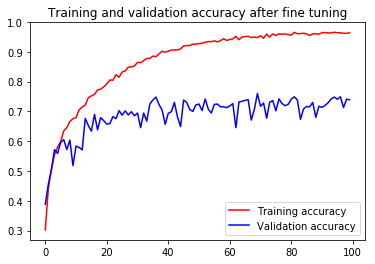

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy after fine tuning')
plt.legend(loc=0)
plt.savefig(Base_dir+"TRAINING_PLOT_FILE.png", bbox_inches='tight')
plt.savefig(Base_dir+"TRAINING_PLOT_FILE.png", bbox_inches='tight')

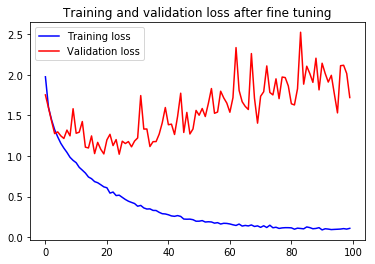

In [25]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss after fine tuning')
plt.legend()
plt.savefig(Base_dir+"VALIDATION_PLOT_FILE.png", bbox_inches='tight')
plt.savefig(Base_dir+"VALIDATION_PLOT_FILE.png", bbox_inches='tight')

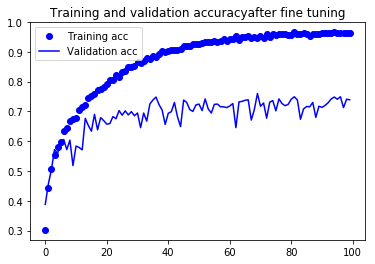

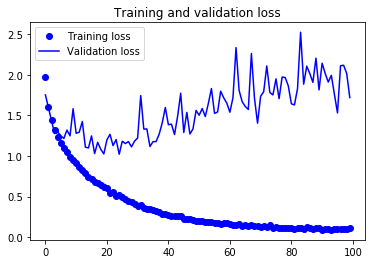

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracyafter fine tuning')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
model1 = load_model(Base_dir+'beforefinetune_skin_net0100.hdf5')
validation_generator.reset()
Y_pred = model1.predict_generator(validation_generator, validation_generator.samples//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ["Acne-Rosacea", "Basal cell carcinoma"," Hair Loss Alopecia and other Hair Diseases",
             " Herpes"," Melanoma Skin Cancer Nevi and Moles",
            " Nail Fungus and other Nail Disease" , "Urticaria Hives"," Vasculitis"," Warts","seborrheic-keratoses"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 82   0   3   4   1   0   5   7   6   2]
 [  2  64   1  14  10   2   0   8   0   9]
 [  0   0 101   0   1   8   0   0   0   0]
 [  8   3   3  75   1   0   3  14   3   0]
 [  0   1  11   1  86   0   5   1   2   3]
 [  0   0  12   1   0  88   1   3   4   1]
 [  1   1   0   2   1   1  98   3   3   0]
 [  4   3   1   3   6   0  11  76   5   1]
 [  3   4   2   4   5   2   3   5  81   1]
 [  4   5   6   3  18   1   2   2   7  62]]
Classification Report
                                             precision    recall  f1-score   support

                               Acne-Rosacea       0.79      0.75      0.77       110
                       Basal cell carcinoma       0.79      0.58      0.67       110
 Hair Loss Alopecia and other Hair Diseases       0.72      0.92      0.81       110
                                     Herpes       0.70      0.68      0.69       110
        Melanoma Skin Cancer Nevi and Moles       0.67      0.78      0.72       110
         Nail Fungu

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 18,914,634
Trainable params: 17,179,146
Non-trainable params: 1,735,488
_________________________________________________________________


In [0]:
pre_trained_model.trainable = True

set_trainable = False
for layer in pre_trained_model.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False



In [0]:
model.compile(optimizer = optimizers.RMSprop(lr=0.000003, rho=0.9, epsilon=1e-08, decay=0.00001), 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 18,914,634
Trainable params: 17,179,146
Non-trainable params: 1,735,488
_________________________________________________________________


In [0]:
callback1=myCallback()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1,
callbacks=[callback1])

Epoch 1/50
69/68 [==============================] - 57s 829ms/step - loss: 0.0496 - acc: 0.9800 - val_loss: 1.9509 - val_acc: 0.7527
Epoch 2/50
69/68 [==============================] - 51s 742ms/step - loss: 0.0347 - acc: 0.9830 - val_loss: 2.0818 - val_acc: 0.7509
Epoch 3/50
67/68 [============================>.] - ETA: 1s - loss: 0.0344 - acc: 0.9834

In [0]:
model.save(Base_dir+'skin_net_after_fineTuningAF.hdf5')


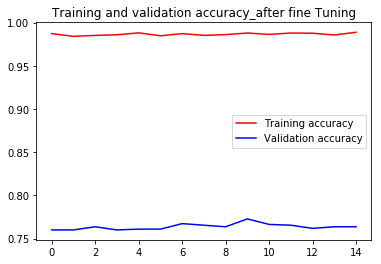

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy_after fine Tuning')
plt.legend(loc=0)
plt.savefig(Base_dir+"TRAINING_PLOT_FILE_after_fineTune.png", bbox_inches='tight')

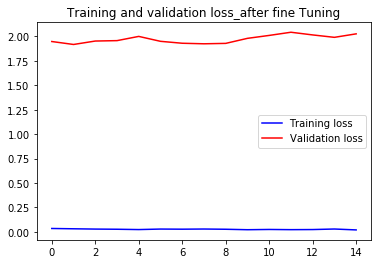

In [0]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss_after fine Tuning')
plt.legend()
plt.savefig(Base_dir+"VALIDATION_PLOT_FILE_with_finetune.png", bbox_inches='tight')

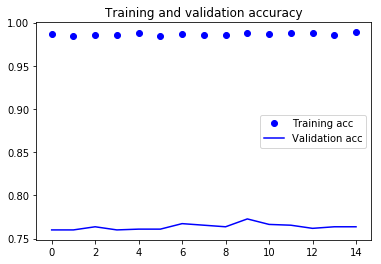

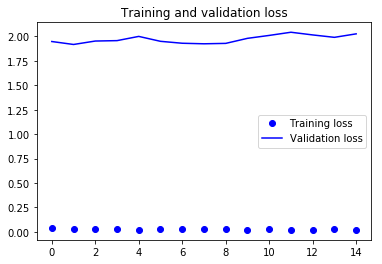

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model
model1 = load_model(Base_dir+'skin_net_after_fineTuningAF.hdf5')
validation_generator.reset()
Y_pred = model1.predict_generator(validation_generator, validation_generator.samples//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred,axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ["Acne-Rosacea", "Basal cell carcinoma"," Hair Loss Alopecia and other Hair Diseases",
             " Herpes"," Melanoma Skin Cancer Nevi and Moles",
            " Nail Fungus and other Nail Disease" , "Urticaria Hives"," Vasculitis"," Warts","seborrheic-keratoses"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Saving alopecia-areata-17.jpg to alopecia-areata-17 (4).jpg
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
The predicted disease found to be  Hair Loss Alopecia and other Hair Diseases
]8;;https://www.mayoclinic.org/diseases-conditions/nail-fungus/diagnosis-treatment/drc-20353300Ctrl+Click here]8;;


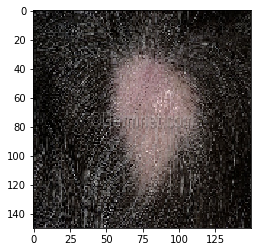

In [0]:
from keras.models import load_model
from google.colab import files
from keras.preprocessing import image
import numpy as np
from matplotlib.pyplot import imshow
from keras.applications.imagenet_utils import preprocess_input
import scipy.misc

model = load_model(Base_dir+'skin_net_after_fineTuning15.hdf5')
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
CATEGORIES =["Acne-Rosacea", "Basal cell carcinoma"," Hair Loss Alopecia and other Hair Diseases",
             " Herpes"," Melanoma Skin Cancer Nevi and Moles",
            " Nail Fungus and other Nail Disease" , "Urticaria Hives"," Vasculitis"," Warts","seborrheic-keratoses"]
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  #print('Input image shape:', x.shape)
  
  images = np.vstack([x])
  classes = model.predict(images)#, batch_size=10)
  #print(fn)
  
  print(classes[0])
  maximum=0.9
  for i,value in enumerate(classes[0]):
    if value>maximum:
      index=i
  print("The predicted disease found to be "+CATEGORIES[index]) 
  #print(type(CATEGORIES[int(classes[0][0])]))  
  
 

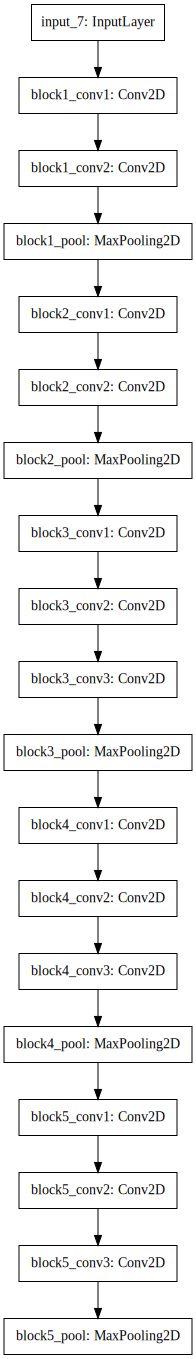

In [0]:
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
%matplotlib inline
plot_model(pre_trained_model, to_file=Base_dir+'model.png')
SVG(model_to_dot(pre_trained_model).create(prog='dot', format='svg'))


In [0]:
import cv2
import tensorflow as tf

CATEGORIES =["Acne-Rosacea", "Basal cell carcinoma"," Hair Loss Alopecia and other Hair Diseases",
             " Herpes"," Melanoma Skin Cancer Nevi and Moles",
            " Nail Fungus and other Nail Disease" , "Urticaria Hives"," Vasculitis"," Warts","seborrheic-keratoses"]
uploaded = files.upload()


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)


model = tf.keras.models.load_model("64X3-Cnn.model")

prediction = model.predict([prepare('rash30.jpg')])
print(int(prediction))  # will be a list in a list.
print(CATEGORIES[int(prediction[0][0])])